# Requirements

In [3]:
!python -m pip install pyyaml
import sys, os, distutils.core

In [1]:
from google.colab.patches import cv2_imshow

In [ ]:
!apt-get install tesseract-ocr
!sudo apt-get install tesseract-ocr
!pip install pytesseract
import cv2
import pytesseract

In [4]:
pip install pytesseract pillow

In [5]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,246 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [6]:
import pytesseract
from PIL import Image
import glob
import cv2
import numpy as np

In [7]:
from IPython.display import display
from PIL import Image as PILImage

In [8]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-0hn1i4av
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-0hn1i4av
  Resolved https://github.com/facebookresearch/detectron2.git to commit cc9266c2396d5545315e3601027ba4bc28e8c95b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6147634 sha256=1db06b094759b45befbf9fe836671

In [9]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [10]:

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


Pre trained model on this image

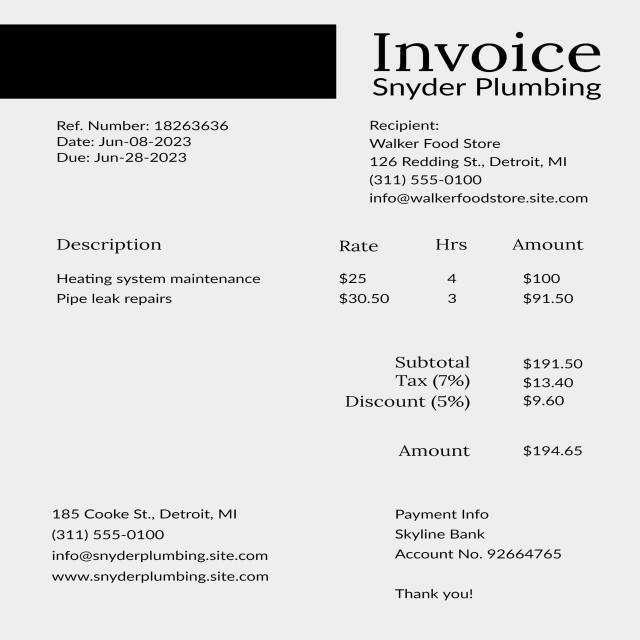

In [11]:

im = cv2.imread("/content/drive/MyDrive/Invoice- NER detection.v2-yolov9.tensorflow/train/103_jpg.rf.25eeb752ea17d65992634c723f125727.jpg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[03/16 19:35:58 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:02, 79.2MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:

# look at the outputs - tensors and bounding boxes.
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


In [12]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

NameError: name 'cfg' is not defined

# Train our own model

In [13]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("train", {}, "/content/drive/MyDrive/Invoice.coco/train/_annotations.coco.json","/content/drive/MyDrive/Invoice.coco/train")
register_coco_instances("valid", {}, "/content/drive/MyDrive/Invoice.coco/valid/_annotations_valid.coco.json", "/content/drive/MyDrive/Invoice.coco/valid")

In [14]:
train_metadata = MetadataCatalog.get("train")
train_dataset_dicts = DatasetCatalog.get("train")

[03/17 14:06:34 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Invoice.coco/train/_annotations.coco.json takes 3.97 seconds.
WARNING [03/17 14:06:34 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/17 14:06:34 d2.data.datasets.coco]: Loaded 774 images in COCO format from /content/drive/MyDrive/Invoice.coco/train/_annotations.coco.json


In [15]:
val_metadata = MetadataCatalog.get("valid")
val_dataset_dicts = DatasetCatalog.get("valid")

WARNING [03/17 14:06:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/17 14:06:35 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/MyDrive/Invoice.coco/valid/_annotations_valid.coco.json


In [16]:
from matplotlib import pyplot as plt

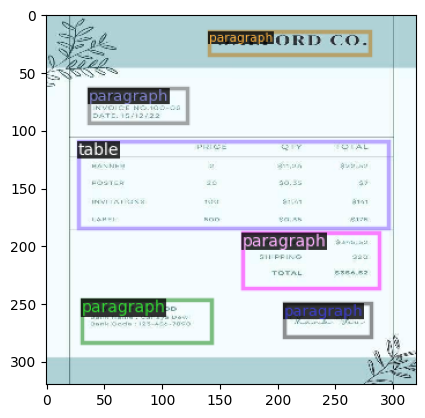

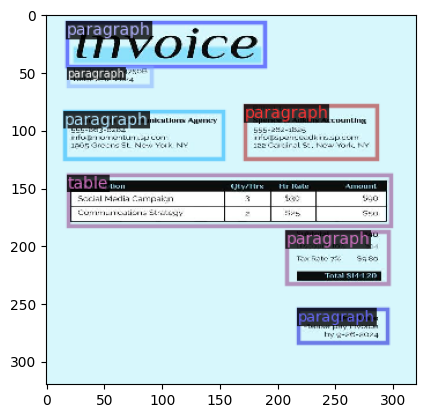

In [17]:
# Visualize some random samples
for d in random.sample(train_dataset_dicts , 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()


# Train Model

In [18]:

from detectron2.engine import DefaultTrainer

In [ ]:
cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/ColabNotebooks/models/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))  # Use a Faster R-CNN model for object detection
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Initialize from pre-trained COCO detection model
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 2000 # Reduce the number of iterations for faster training (adjust as needed)
cfg.SOLVER.STEPS = []  # No LR steps (adjust as needed)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Number of classes including background (adjust according to your dataset)
cfg.MODEL.RETINANET.NUM_CLASSES = 2  # For RetinaNet architecture (adjust according to your dataset)
cfg.MODEL.RPN.NUM_CLASSES = 2  # For Faster R-CNN architecture (adjust according to your dataset)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)


In [ ]:
trainer.train()

In [ ]:

# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir output

In [33]:
import yaml
# Save the configuration to a config.yaml file
# Save the configuration to a config.yaml file
config_yaml_path = "/content/drive/MyDrive/ColabNotebooks/models/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

# Inference

In [34]:
#cfg = get_cfg() DONT

In [20]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.OUTPUT_DIR = "/content/drive/MyDrive/ColabNotebooks/models/Detectron2_Models/"
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold


In [21]:
# Utilizar la CPU para inferencia
#cfg.MODEL.DEVICE = "cpu"

# Crear un predictor
predictor = DefaultPredictor(cfg)

[03/17 14:06:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/ColabNotebooks/models/Detectron2_Models/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


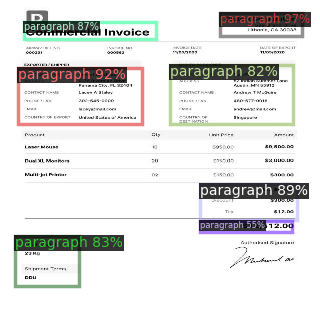

In [22]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dataset_dicts, 1):    #select number of images for display
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [23]:

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("valid", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "valid")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

WARNING [03/17 14:07:23 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/17 14:07:23 d2.data.datasets.coco]: Loaded 73 images in COCO format from /content/drive/MyDrive/Invoice.coco/valid/_annotations_valid.coco.json
[03/17 14:07:23 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| Paragraph  | 0            | paragraph  | 575          |   table    | 71           |
|            |              |            |              |            |              |
|   total    | 646          |            |              |            |              |
[03/17 14:07:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[03/17 14:07:23 d2.data

# Load a new image and object detection

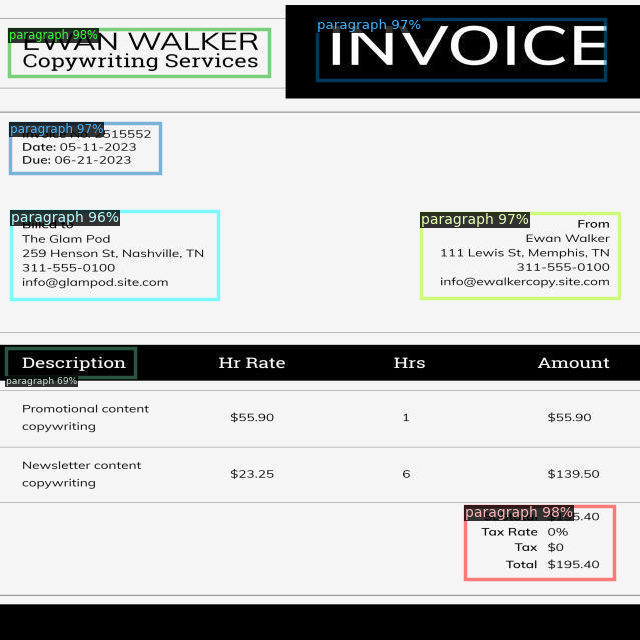

In [24]:
new_im = cv2.imread("/content/drive/MyDrive/Invoice.coco/test/166_png_jpg.rf.287c11c862a40f6c5ea03df3a407d6e6.jpg")
outputs  = predictor(new_im)

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

# Process multiple images

In [ ]:
# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Invoice.coco/test"

# Output directory where the segmented images will be saved
output_directory = "/content/drive/MyDrive/Invoice.coco/test_results"  # Replace this with the path to your desired output directory

for image_filename in os.listdir(input_images_directory):
    image_path = os.path.join(input_images_directory, image_filename)
    try:
        # Load the image
        new_im = cv2.imread(image_path)
        if new_im is None:
            raise Exception("Failed to load image: {}".format(image_path))

        # Perform prediction on the new image
        outputs = predictor(new_im)

        # Draw the predictions on the image
        v = Visualizer(new_im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

        # Create the output filename with _result extension
        result_filename = os.path.splitext(image_filename)[0] + "_result.png"
        output_path = os.path.join(output_directory, result_filename)

        # Save the image with predictions
        cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

        print("Object detection completed for:", image_filename)

    except Exception as e:
        # Print error message if any exception occurs
        print("Error processing image {}: {}".format(image_filename, str(e)))

print("Object detection of all images completed.")

# Extract Text

In [ ]:
# Path to the input image file
image_path = "/content/drive/MyDrive/Invoice.coco/test/166_png_jpg.rf.287c11c862a40f6c5ea03df3a407d6e6.jpg"

# Read the image
image = cv2.imread(image_path)

# Make predictions
outputs = predictor(image)

# Extract detected instances
instances = outputs["instances"].to("cpu")

# Get the predicted classes and coordinates of the detected objects
classes = instances.pred_classes.numpy()
boxes = instances.pred_boxes.tensor.numpy()

# Loop over the detected instances and print the coordinates and classes
for cls, box in zip(classes, boxes):
    x1, y1, x2, y2 = box
    print("Class:", cls)
    print("Coordinates:", (x1, y1), (x2, y2))



In [ ]:
# Path to the input image file
image_path = "/content/drive/MyDrive/Invoice.coco/test/166_png_jpg.rf.287c11c862a40f6c5ea03df3a407d6e6.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binarization if necessary (depends on the quality of the image)
# ret, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Extract text using pytesseract
text = pytesseract.image_to_string(gray_image)

# Print the extracted text
print("Extracted text:")
print(text)

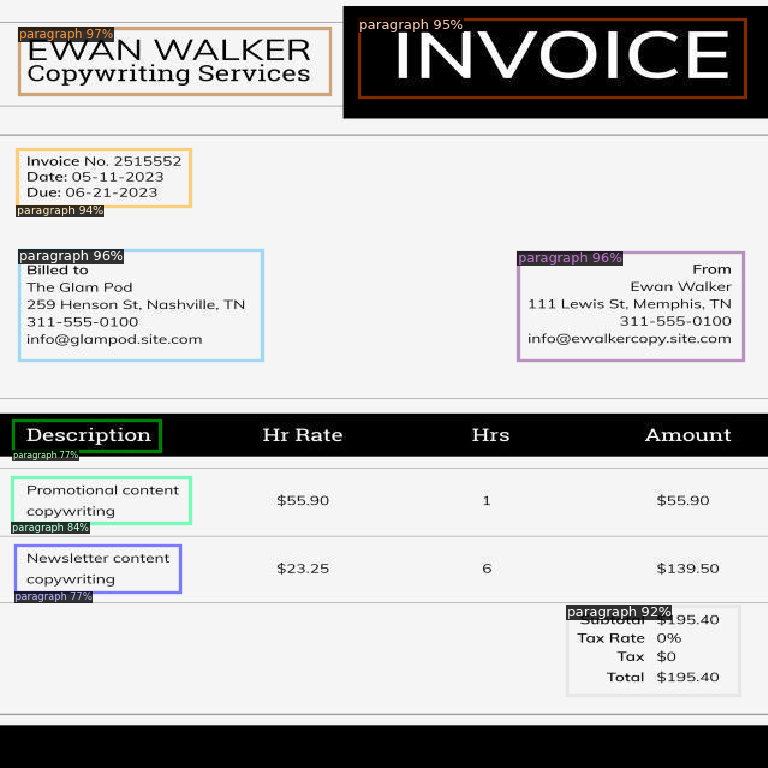

In [26]:
# Path to the image with annotations
image_path = "/content/drive/MyDrive/Invoice.coco/test_results/166_png_jpg.rf.287c11c862a40f6c5ea03df3a407d6e6_result.png"

# Load the image with annotations
image_with_annotations = cv2.imread(image_path)

# Display the image with annotations
cv2_imshow(image_with_annotations)

In [72]:
# Load the image
image = cv2.imread(image_path)

# Perform prediction on the image
outputs = predictor(image)

# Extract the detected instances
instances = outputs["instances"].to("cpu")

# Get the classes and coordinates of the detected objects
classes = instances.pred_classes.numpy()
boxes = instances.pred_boxes.tensor.numpy()

# Loop over the detected instances
for cls, box in zip(classes, boxes):
    # If the class is equal to 1 (or the index of the desired class)
    if cls == 1:
        # Get the coordinates of the region
        x1, y1, x2, y2 = box.astype(int)

        # Extract the Region of Interest (ROI)
        roi = image[y1:y2, x1:x2]

        # Convert the ROI to grayscale
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # Extract text using pytesseract
        text = pytesseract.image_to_string(gray_roi)

        # Print the extracted text and coordinates
        print("Extracted text:", text)
        print("Class:", cls)
        print("Coordinates:", (x1, y1), (x2, y2))

Extracted text: 123 Sucet
‘and ic 12248
(25 134567

<‘eoltinitieiiie

Class: 1
Coordinates: (356, 64) (466, 116)
Extracted text: Sobvoral: 675,

Misecneous:
Balance Doe: 678

Class: 1
Coordinates: (373, 452) (533, 522)
Extracted text: Lisa Robason Photography
241 Miles Fale Road
‘Ture Fats, MA 01301

“Ferme: Due on Receipt

Class: 1
Coordinates: (106, 181) (237, 266)
Extracted text: Iavoice Nos aot40g22
Dae September 24,2108

ext: on123is67

Class: 1
Coordinates: (329, 172) (520, 259)
Extracted text: Plank pret

Class: 1
Coordinates: (295, 525) (345, 547)
Extracted text: Quantiy Description Rae Toul

39s Asisting on shoot or “Boppy” om 9/22/14 and 923/14 at 2s ws
‘hit Stasis ia NYC

Class: 1
Coordinates: (110, 310) (524, 359)
Extracted text: Daffy Duck

Class: 1
Coordinates: (117, 76) (214, 98)
Extracted text: Invoice

Class: 1
Coordinates: (435, 147) (535, 174)


## Improve results applying Preprocess of images

In [48]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Increase contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast = clahe.apply(gray)

    # Reduce noise
    denoised = cv2.fastNlMeansDenoising(contrast, h=30, templateWindowSize=7, searchWindowSize=21)

    return denoised

In [29]:
# Perform prediction on the image
outputs = predictor(image)

# Extract detected instances
instances = outputs["instances"].to("cpu")

# Get the classes and coordinates of the detected objects
classes = instances.pred_classes.numpy()
boxes = instances.pred_boxes.tensor.numpy()

In [62]:
def preprocess_image(image, target_size=(640, 640), brightness_factor=1.2):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized = cv2.resize(gray, target_size)

    # Increase brightness
    brightened = cv2.convertScaleAbs(resized, alpha=brightness_factor, beta=0)

    return brightened

In [63]:
# Loop over the detected instances
for cls, box in zip(classes, boxes):
    # If the class is equal to 1 (or the index of the desired class)
    if cls == 1:
        # Get the coordinates of the region
        x1, y1, x2, y2 = box.astype(int)

        # Extract the Region of Interest (ROI)
        roi = image[y1:y2, x1:x2]

        # Preprocess the ROI
        processed_roi = preprocess_image(roi)

        # Extract text using pytesseract
        text = pytesseract.image_to_string(processed_roi)

        # Print the extracted text and coordinates
        print("Extracted text:", text)
        #print("Class:", cls)
        #print("Coordinates:", (x1, y1), (x2, y2))

Extracted text: paragraph 96%

Billed to

The Glam Pod

259 Henson St, Nashville, TN
311-555-0100
infotdglampod.site.com

Extracted text: Ee
rom

Ewan Walker
111 Lewis St, Memphis, TN
311-555-0100

info@ewalkercopy.site,com

Extracted text:    

Tax Rate 0%
Tax $0
Total $195.40

Extracted text: 
Extracted text: Invoice No, 251555?
Date: 05-11-2023
Due: 69212023

 

paragraph 94%

Extracted text: 
Extracted text: Newsletter content

copywriting

 

Extracted text: Promotional content

cavity
Perr T

Extracted text: aH

lhl OO

Extracted text: Description

 

paragraph 77%,

Promotional content

copywriting

eye le-1*] i) dee or

Newsletter content

copywriting
SS a Se



In [71]:
# Loop sobre las instancias detectadas
for cls, box in zip(classes, boxes):
    # Si la clase es igual a 1 (o el índice de la clase deseada)
    if cls == 1:
        # Obtener las coordenadas de la región
        x1, y1, x2, y2 = box.astype(int)

        # Extraer la Región de Interés (ROI)
        roi = image[y1:y2, x1:x2]

        # Preprocesar la ROI
        processed_roi = preprocess_image(roi)

        # Extraer texto utilizando pytesseract
        text = pytesseract.image_to_string(processed_roi)

        # Imprimir el texto extraído y las coordenadas
        print("Extracted text:", text)
        print("Coordinates:", (x1, y1), (x2, y2))

Extracted text: paragraph 96%

Billed to

The Glam Pod

259 Henson St, Nashville, TN
311-555-0100
infotdglampod.site.com

Coordinates: (15, 245) (265, 361)
Extracted text: Ee
rom

Ewan Walker
111 Lewis St, Memphis, TN
311-555-0100

info@ewalkercopy.site,com

Coordinates: (512, 250) (741, 357)
Extracted text:    

Tax Rate 0%
Tax $0
Total $195.40

Coordinates: (555, 600) (734, 698)
Extracted text: 
Coordinates: (9, 31) (319, 91)
Extracted text: Invoice No, 251555?
Date: 05-11-2023
Due: 69212023

 

paragraph 94%

Coordinates: (13, 148) (193, 219)
Extracted text: 
Coordinates: (344, 16) (749, 98)
Extracted text: Newsletter content

copywriting

 

Coordinates: (10, 543) (180, 603)
Extracted text: Promotional content

cavity
Perr T

Coordinates: (8, 475) (188, 528)
Extracted text: aH

lhl OO

Coordinates: (6, 415) (167, 459)
Extracted text: Description

 

paragraph 77%,

Promotional content

copywriting

eye le-1*] i) dee or

Newsletter content

copywriting
SS a Se

Coordinates

## Example with a training image

In [ ]:
train_metadata = MetadataCatalog.get("train")
train_dataset_dicts = DatasetCatalog.get("train")

WARNING [03/16 21:18:13 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/16 21:18:13 d2.data.datasets.coco]: Loaded 774 images in COCO format from /content/drive/MyDrive/Invoice.coco/train/_annotations.coco.json


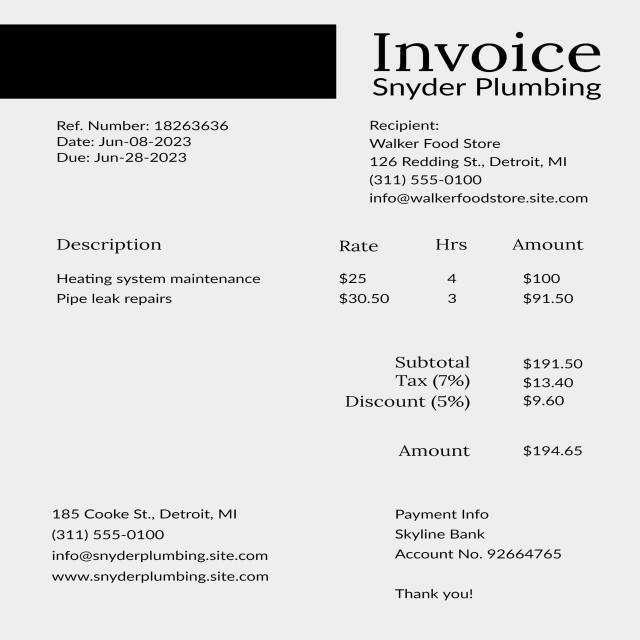

Texto extraído de la región (Clase 1): Invoice

Snyder Plumbing

Texto extraído de la región (Clase 1): Recipient:
Walker Food Store

126 Redding St., Detroit, MI
(311) 555-0100
info@walkerfoodstore.site.com

Texto extraído de la región (Clase 1): Ref. Number: 18263636
Date: Jun-08-2023
Due: Jun-28-2023

Texto extraído de la región (Clase 1): Subtotal $191.50
Tax (7%) $13.40
Discount (5%) $9.60

Amount $194.65

Texto extraído de la región (Clase 1): 185 Cooke St., Detroit, MI
(311) 555-0100

info@snyderplumbing.site.com
www.snyderplumbing.site.com

Texto extraído de la región (Clase 1): Payment Info
Skyline Bank
Account No. 92664765

Thank you!



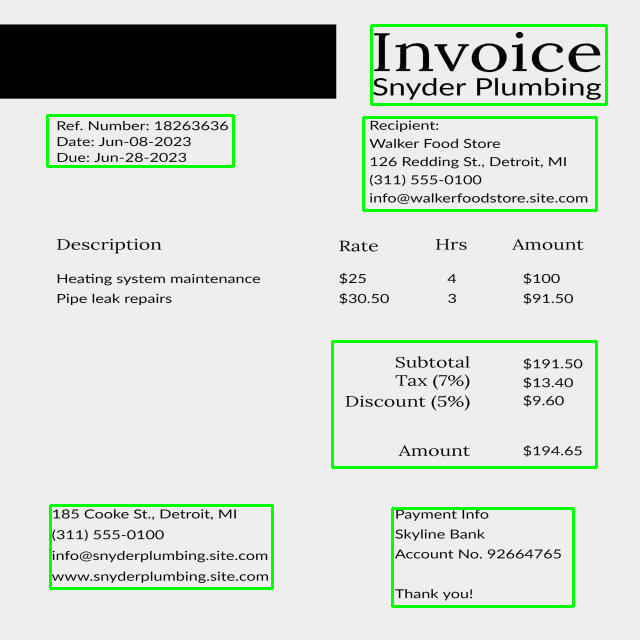

In [ ]:
# COCO JSON annotations file path
annotations_file = "/content/drive/MyDrive/Invoice.coco/train/_annotations.coco.json"

# Load annotations from the file
with open(annotations_file, "r") as f:
    annotations = json.load(f)

# Get annotations for the specific image (using the same image as before)
image_filename = "103_jpg.rf.25eeb752ea17d65992634c723f125727.jpg"
image_annotations = next((x for x in annotations["images"] if x["file_name"] == image_filename), None)

if image_annotations is not None:
    # Load the image
    image_path = "/content/drive/MyDrive/Invoice.coco/train/" + image_filename
    image = cv2.imread(image_path)

    # Show the image
    cv2_imshow(image)

    # Get annotations of the image
    image_id = image_annotations["id"]
    image_annotations = [x for x in annotations["annotations"] if x["image_id"] == image_id]

    # Loop over the annotations
    for annotation in image_annotations:
        # Extract bounding box coordinates and class
        x, y, w, h = annotation["bbox"]
        cls = annotation["category_id"]

        # If the class is equal to 1 (or the desired class)
        if cls == 1:
            # Extract Region of Interest (ROI) from the image
            roi = image[int(y):int(y+h), int(x):int(x+w)]

            # Convert ROI to grayscale
            gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

            # Extract text using pytesseract
            text = pytesseract.image_to_string(gray_roi)

            # Print the extracted text
            print("Extracted text from region (Class 1):", text)

            # Draw bounding box on the original image
            cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)

    # Show the image with annotations
    cv2_imshow(image)
else:
    print("No annotations found for the image:", image_filename)

# Save in CSV the object detection

In [54]:

import csv
from skimage.measure import regionprops, label


# Assuming you have already defined the 'predictor' object and loaded the model.
# Also, make sure 'metadata' is defined appropriately.

# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Invoice.coco/test"

# Output directory where the CSV file will be saved
output_csv_path = "/content/drive/MyDrive/Invoice.coco/test_results/output_objects.csv"  # Replace this with the path to your desired output CSV file

# Open the CSV file for writing
# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row in the CSV file
    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Confidence", "BoundingBox"])

    # Loop over the images in the input folder
    for image_filename in os.listdir(input_images_directory):
        image_path = os.path.join(input_images_directory, image_filename)
        try:
            # Load the image
            new_im = cv2.imread(image_path)

            # Check if the image was loaded successfully
            if new_im is None:
                raise Exception("Failed to load image: {}".format(image_path))

            # Perform prediction on the new image
            outputs = predictor(new_im)

            # Get the predicted class labels and bounding boxes
            pred_classes = outputs["instances"].pred_classes.to("cpu").numpy()
            pred_boxes = outputs["instances"].pred_boxes.tensor.to("cpu").numpy()

            # Loop over the predicted objects
            for i in range(len(pred_classes)):
                object_number = i + 1  # Object number starts from 1
                class_label = pred_classes[i]
                class_name = train_metadata.thing_classes[class_label]
                confidence = outputs["instances"].scores[i]
                bbox = pred_boxes[i]

                # Write the object-level information to the CSV file
                csvwriter.writerow([image_filename, class_name, object_number, confidence, bbox])

        except Exception as e:
            # Print error message if any exception occurs
            print("Error processing image {}: {}".format(image_filename, str(e)))

print("Object-level information saved to CSV file.")

Error processing image _annotations.coco.json: Failed to load image: /content/drive/MyDrive/Invoice.coco/test/_annotations.coco.json
Object-level information saved to CSV file.


# Generate Plots

<ipython-input-56-40e5de8e48d0>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class Name", y="Object Number", data=avg_objects_per_class, ci=None, order=class_names)


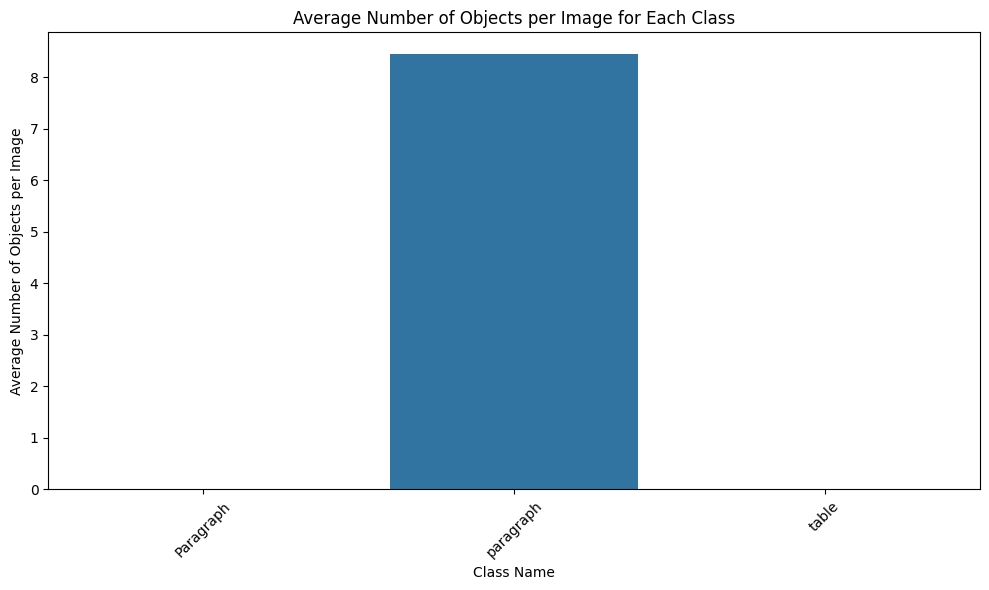

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the CSV file containing the object-level information
csv_file_path = "/content/drive/MyDrive/Invoice.coco/test_results/output_objects.csv"  # Update with your CSV file path

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Get class names from train_metadata.thing_classes
class_names = train_metadata.thing_classes

# Group the data by both "File Name" and "Class Name" and calculate the average number of objects per image for each class
# first group the data by both "File Name" and "Class Name" and count the number of objects within each group.
# Then, group the data by "Class Name" only and calculate the mean of the counts, which gives us the average number of objects per image for each class.
avg_objects_per_class = df.groupby(["File Name", "Class Name"])["Object Number"].count().reset_index()
avg_objects_per_class = avg_objects_per_class.groupby("Class Name")["Object Number"].mean().reset_index()

# Plot: Average number of objects per image for each class
plt.figure(figsize=(10, 6))
sns.barplot(x="Class Name", y="Object Number", data=avg_objects_per_class, ci=None, order=class_names)
plt.xticks(rotation=45)
plt.xlabel("Class Name")
plt.ylabel("Average Number of Objects per Image")
plt.title("Average Number of Objects per Image for Each Class")
plt.tight_layout()
plt.show()



# Binary

In [59]:
import os
import cv2
import numpy as np
import torch
from detectron2.utils.visualizer import Visualizer

# Directory path to the input images folder
input_images_directory = "/content/drive/MyDrive/Invoice.coco/test"

# Output directory where the images with object detections will be saved
output_directory = "/content/drive/MyDrive/Invoice.coco/test_results_detection"

# Loop over the images in the input folder
for image_filename in os.listdir(input_images_directory):
    try:
        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if new_im is None:
            raise Exception("Failed to load image: {}".format(image_path))

        # Perform prediction on the new image
        outputs = predictor(new_im)

        # Visualize the predictions on the image
        v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata, scale=1.2)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

        # Create the output filename
        output_filename = os.path.splitext(image_filename)[0] + "_detection.png"
        output_path = os.path.join(output_directory, output_filename)

        # Save the image with object detections
        cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

        print("Object detection completed for:", image_filename)

    except Exception as e:
        # Print error message if any exception occurs
        print("Error processing image {}: {}".format(image_filename, str(e)))

print("Object detection of all images completed.")


Object detection completed for: 435_png_jpg.rf.39919fc667e5cb790dedf2620be63337.jpg
Object detection completed for: 208_png_jpg.rf.5b9e1df3f97f91627da48c3824b67528.jpg
Object detection completed for: 389_png_jpg.rf.33c46bcf76a345c0fd041a7e2868336c.jpg
Object detection completed for: 391_png_jpg.rf.93b60304c096fd1a9c440ceaa2190183.jpg
Object detection completed for: 515_png_jpg.rf.cdd36ceb31244109290d55c50cfc4e3b.jpg
Object detection completed for: 572_png_jpg.rf.25688bf9c251bee53aedbb1f6680527b.jpg
Object detection completed for: 200_png_jpg.rf.596a1ae64bdc3415ff8406cd29b6f3db.jpg
Object detection completed for: 354_png_jpg.rf.c1c07ad94eb54bcdfe569ec43be05aba.jpg
Object detection completed for: 399_jpg.rf.e9910fcd1f7b7a5647f46116d58362dd.jpg
Object detection completed for: 522_png_jpg.rf.1f54ff35433d9e0af57af4629a04b800.jpg
Object detection completed for: 527_jpg.rf.b592fbcb25c7ec5d26c586537ee9d220.jpg
Object detection completed for: 266_png_jpg.rf.bf389d355611bf876e7ae17840171c89.jpg
